In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import plot_tree
import os

In [21]:
dataset = load_iris()

In [22]:
## DataFrame
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['Target'] = dataset.target

In [23]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: xlabel='Target'>

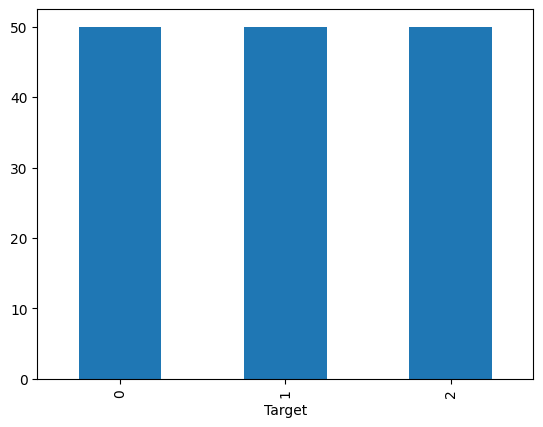

In [25]:
df.Target.value_counts().plot(kind='bar')

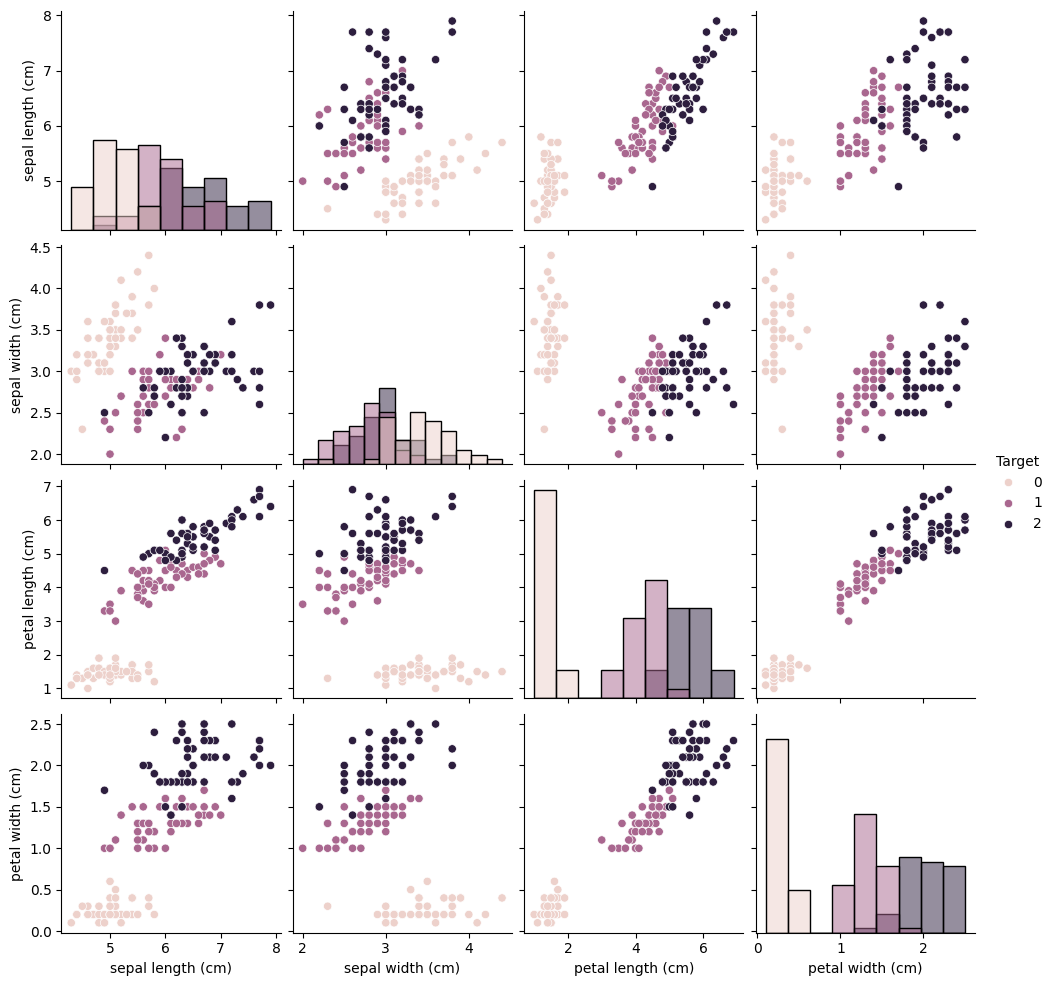

In [26]:
sns.pairplot(df,hue='Target',diag_kind='hist')

In [27]:
X = df.drop('Target',axis=1)
y = df.Target

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
y_pred = model.predict(X_test)

In [31]:
print('accuracy_score',accuracy_score(y_test,y_pred))

accuracy_score 1.0


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(50.722222222222214, 0.5, 'actual')

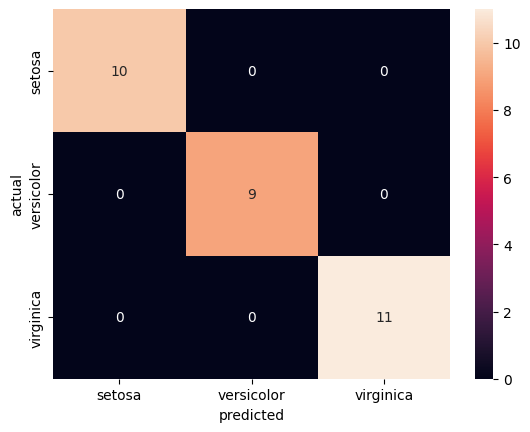

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,xticklabels=dataset.target_names,yticklabels=dataset.target_names)
plt.xlabel('predicted')
plt.ylabel('actual')

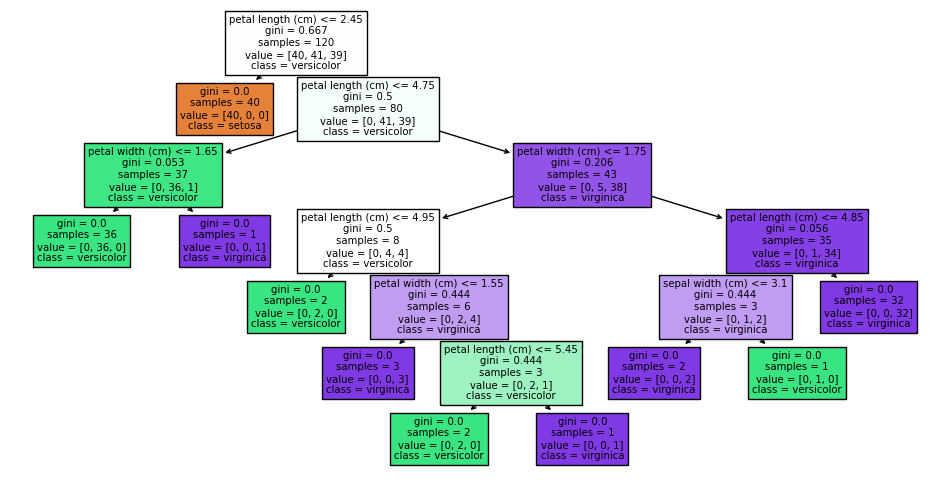

In [34]:
## Decision Tree Visualization

plt.figure(figsize=(12,6))
plot_tree(model, feature_names=dataset.feature_names, class_names=dataset.target_names, filled=True)
path = os.path.join(os.path.dirname(os.getcwd()),'outputs')
os.makedirs(path,exist_ok=True)
        
tree_graph_path = os.path.join(path, "iris_model_tree_graph.jpg")
plt.savefig(tree_graph_path)